In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import os

%matplotlib inline

os.chdir("/volume1/home/tdeng/SingleCell/scRNA-FeatureSelection/")
plt.style.use('seaborn')  # ggplot
matplotlib.rcParams['font.family'] = 'Arial' # 'Times New Roman'

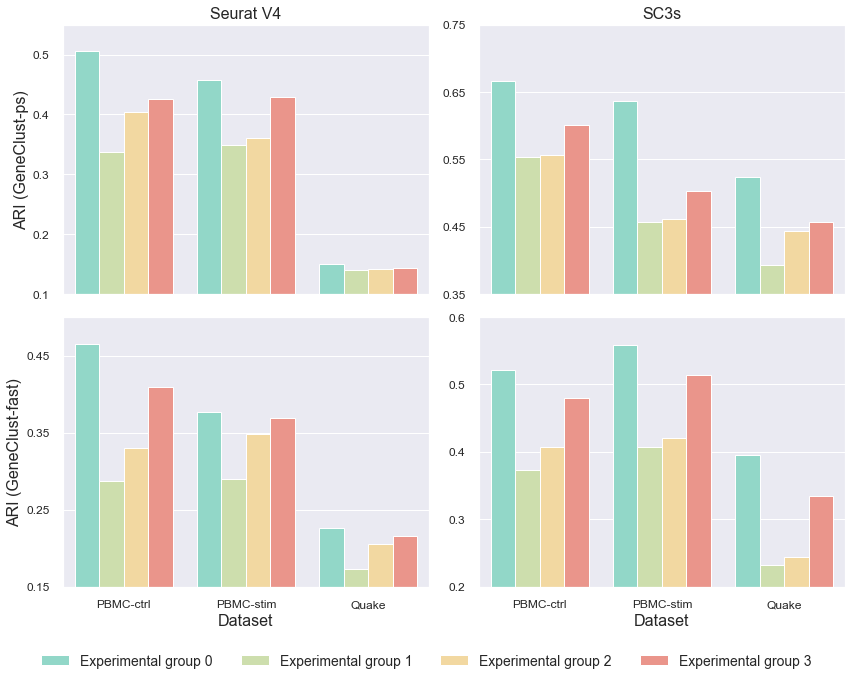

In [2]:
fast_data = pd.read_excel("revision/GeneClust-fast.xlsx", index_col=[0,1], sheet_name=['Seurat V4', 'SC3s'])
fast_data['Seurat V4'].reset_index(names=['Dataset', 'Group'], inplace=True)
fast_data['SC3s'].reset_index(names=['Dataset', 'Group'], inplace=True)
ps_data = pd.read_excel("revision/GeneClust-ps.xlsx", index_col=[0,1], sheet_name=['Seurat V4', 'SC3s'])
ps_data['Seurat V4'].reset_index(names=['Dataset', 'Group'], inplace=True)
ps_data['SC3s'].reset_index(names=['Dataset', 'Group'], inplace=True)


sns.set_theme(context='notebook', style="darkgrid", font='Arial', palette=sns.color_palette(['#86E3CE', '#D0E6A5', '#FFDD94', '#FA897B', '#CCABD8']))
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


fig, axes = plt.subplots(2, 2, sharex=True, sharey=False, tight_layout=True, figsize=(12, 9))

sns.barplot(x="Dataset", y="ARI", hue="Group", ax=axes[0, 0], data=ps_data['Seurat V4'])
axes[0, 0].get_legend().remove()
axes[0, 0].set(title='Seurat V4', ylabel='ARI (GeneClust-ps)', xlabel=None, ylim=[0.1, 0.55])

sns.barplot(x="Dataset", y="ARI", hue="Group", ax=axes[1, 0], data=fast_data['Seurat V4'])
axes[1, 0].get_legend().remove()
axes[1, 0].set(ylabel='ARI (GeneClust-fast)', ylim=[0.15, 0.5], yticks=np.arange(0.15, 0.55, 0.1))

sns.barplot(x="Dataset", y="ARI", hue="Group", ax=axes[0, 1], data=ps_data['SC3s'])
axes[0, 1].get_legend().remove()
axes[0, 1].set(title='SC3s', ylabel=None, xlabel=None, ylim=[0.35, 0.7], yticks=np.arange(0.35, 0.77, 0.1))

sns.barplot(x="Dataset", y="ARI", hue="Group", ax=axes[1, 1], data=fast_data['SC3s'])
axes[1, 1].set(ylabel=None, ylim=[0.2, 0.6], yticks=np.arange(0.2, 0.7, 0.1))
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(handles, labels)
axes[1, 1].get_legend().remove()
# sns.move_legend(fig, loc='center left', bbox_to_anchor=(1, 0.515))
sns.move_legend(
    fig, "upper center",
    bbox_to_anchor=(.5, 0), ncol=4, title=None, frameon=False,
)
plt.savefig(f"revision/Compare3properties.png", bbox_inches='tight', dpi=1000)

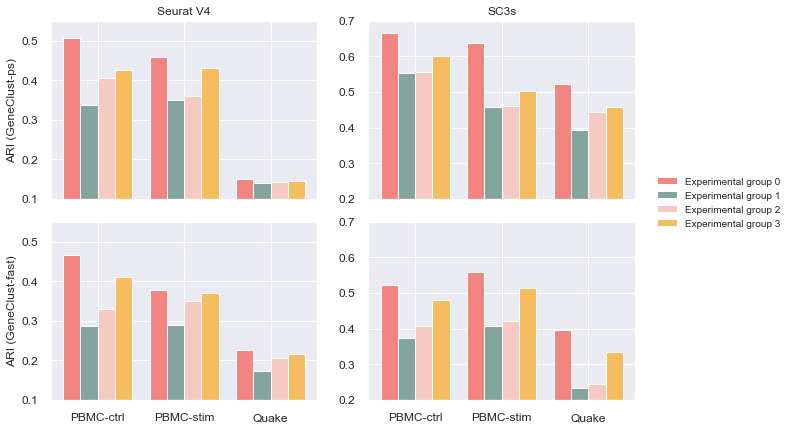

In [3]:
fig, axes = plt.subplots(2, 2,sharex=True, figsize=(9, 6))
fig.tight_layout()

fast_data = pd.read_excel("revision/GeneClust-fast.xlsx", index_col=[0,1], sheet_name=['Seurat V4', 'SC3s'])
ps_data = pd.read_excel("revision/GeneClust-ps.xlsx", index_col=[0,1], sheet_name=['Seurat V4', 'SC3s'])
ylims = {'Seurat V4': [0.1, 0.55], 'SC3s': [0.2, 0.7]}
width = 0.2
x = np.arange(ps_data['Seurat V4'].index.get_level_values(0).unique().shape[0])
bar_names = ps_data['Seurat V4'].index.get_level_values(1).unique().to_numpy()
datasets = ps_data['Seurat V4'].index.get_level_values(0).unique().to_numpy()

for i, clustering_method in enumerate(ps_data.keys()):
    a1 = axes[0, i].bar(x - 1.5 * width, ps_data[clustering_method].loc[:, bar_names[0], :]['ARI'], width, label=bar_names[0], color='#F28482')
    a2 = axes[0, i].bar(x - 0.5 * width, ps_data[clustering_method].loc[:, bar_names[1], :]['ARI'], width, label=bar_names[1], color='#84A59D')
    a3 = axes[0, i].bar(x + 0.5 * width, ps_data[clustering_method].loc[:, bar_names[2], :]['ARI'], width, label=bar_names[2], color='#F5CAC3')
    a4 = axes[0, i].bar(x + 1.5 * width, ps_data[clustering_method].loc[:, bar_names[3], :]['ARI'], width, label=bar_names[3], color='#F6BD60')


    b1 = axes[1, i].bar(x - 1.5 * width, fast_data[clustering_method].loc[:, bar_names[0], :]['ARI'], width, label=bar_names[0], color='#F28482')
    b2 = axes[1, i].bar(x - 0.5 * width, fast_data[clustering_method].loc[:, bar_names[1], :]['ARI'], width, label=bar_names[1], color='#84A59D')
    b3 = axes[1, i].bar(x + 0.5 * width, fast_data[clustering_method].loc[:, bar_names[2], :]['ARI'], width, label=bar_names[2], color='#F5CAC3')
    b4 = axes[1, i].bar(x + 1.5 * width, fast_data[clustering_method].loc[:, bar_names[3], :]['ARI'], width, label=bar_names[3], color='#F6BD60')

    if clustering_method == 'Seurat V4':
        axes[0, i].set_ylabel('ARI (GeneClust-ps)', size=12)
        axes[1, i].set_ylabel('ARI (GeneClust-fast)', size=12)
    axes[0, i].set_title(clustering_method, size=12)
    axes[0, i].set_ylim(ylims[clustering_method])
    axes[1, i].set_ylim(ylims[clustering_method])

    axes[0, i].set_xticks(x, datasets)
axes[1, 1].legend(bbox_to_anchor=(1.05,1.3), loc=2, prop={"size":10})
plt.savefig(f"revision/Compare3properties.png", bbox_inches='tight', dpi=1000)